<h2 align="center" style="color:brown;font-size:200%">Lab 5: Non Linear Spatial Filtering</h2>

## **Introduction:**

Image processing is a vital domain within computer vision that involves manipulating and analyzing images to enhance their quality or extract meaningful information.
Non-linear spatial filtering is a technique in image processing where pixel values are altered based on their surrounding pixels using non-linear operations.
Unlike linear filters, which perform operations like averaging on pixel values, non-linear filters apply a ranking method, where the pixels are ranked based on their intensity values.These methods are particularly effective for removing noise while preserving important image features, such as edges.

One important category of non-linear filters is Order Statistics Filters, which include filters like the Max Filter, Min Filter, and Median Filter. These filters are effective in handling images affected by impulsive noise (e.g., salt-and-pepper noise). In this report, we apply these filters to a given grayscale image and evaluate their effects on image quality.

In this project, we delve into custom implementations of image filters—**Max Filter**, **Min Filter**, and **Median Filter**—using Python's OpenCV and NumPy libraries. These filters are applied to grayscale images to demonstrate their ability to enhance or suppress certain image features. The project also includes histogram analysis to visualize the impact of each filter on image intensity distribution.

## **Problem Statement:**

- The task is to apply three types of **order statistics filters**—**Max**, **Min**, and **Median filters**—on a given grayscale image. These filters are non-linear spatial filters that process each pixel by considering the intensity values of the neighboring pixels within a defined window.
- The goal is to compare how these filters perform in terms of image quality, particularly focusing on **noise reduction**, **edge preservation**, and **detail enhancement**.

- The challenge is to analyze how each of these filters affects the overall appearance of the image, how they differ in handling various types of noise, and how well they preserve important features such as edges and fine details. 

- In addition, the performance of these filters will be evaluated by comparing the results to the original image and visually assessing their effectiveness in **noise suppression**, **preservation of image structure**, and **enhancement of visual clarity**.



### **Objective**
- Perform the Non-Linear Spatial Filtering operation using variants of Order Statistics Filters (Median, Min, and Max Filters) on the provided image. 
- Comment on the quality of the image after the operation is done.- Create a user defined function to perform the operation..

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and display the image
image_path = "img.jpg"  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

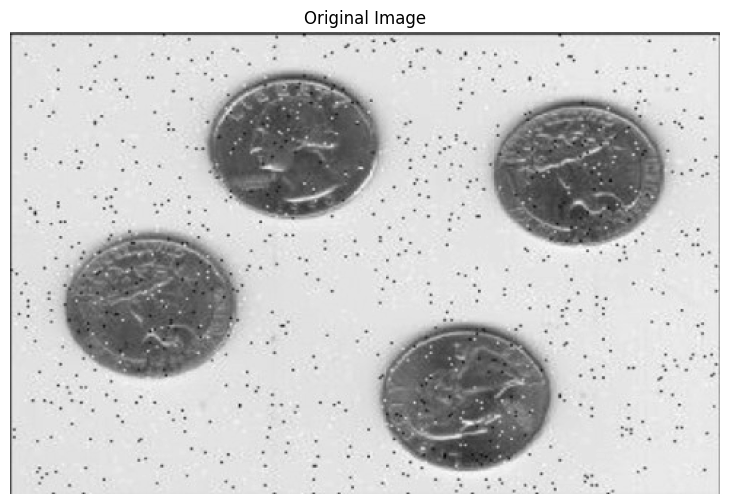

In [3]:
plt.figure(figsize=(12, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')  # Remove axis numbers and labels
plt.show()

## **Interpretation:**

- The image is significantly affected by noise, which appears as random fluctuations in pixel intensity, obscuring the details of the coins.
  
- The contrast is low, making it hard to distinguish between different regions of the image.
  
- Fine details of the coin surfaces and edges are lost due to the noise.
  
- The histogram would likely show a wide distribution of pixel intensities, indicating high noise levels.
  
- Overall image quality is poor because of the noise and low contrast, making it difficult to perceive the coin details 
action.
  
- Human observers would struggle to interpret the image due to the obscured details and lack of distinction between the coins and the r better analysis.


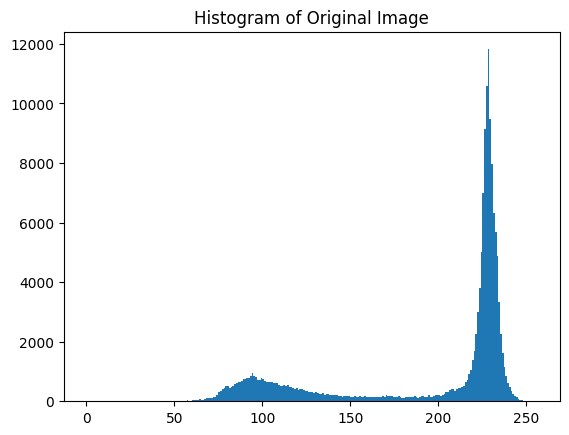

In [4]:
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title("Histogram of Original Image")
plt.show()

In [5]:
image.shape

(317, 487)

In [6]:
if len(image.shape) == 3:  # Color image
    print("The image is a Color (RGB) image.")
    # Convert to grayscale if required
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Converted the image to Grayscale.")
elif len(image.shape) == 2:  # Grayscale or Binary
    unique_values = np.unique(image)
    if len(unique_values) == 2 and set(unique_values).issubset({0, 255}):
        print("The image is a Binary image.")
    else:
        print("The image is already Grayscale.")
else:
    print("Unknown image type.")

The image is already Grayscale.


In [7]:
kernel_size = 3

## **Max Filter:**

In [8]:
# User-defined Max Filter
def max_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size].flatten()
            filtered_image[i, j] = np.max(kernel)
    
    return filtered_image

In [9]:
# Apply Max Filter
max_filtered_image = max_filter(image, kernel_size)

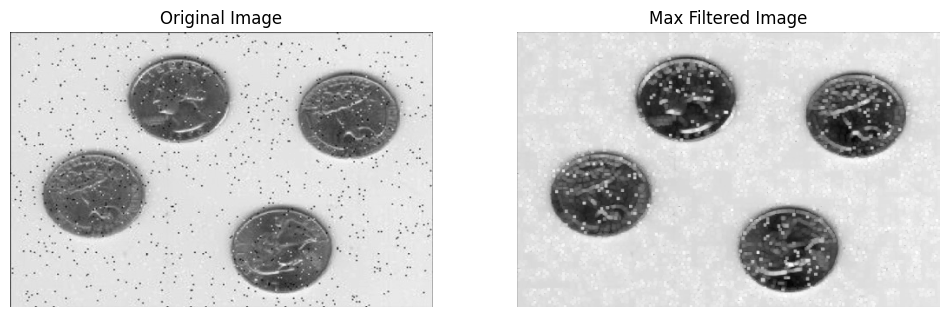

In [10]:
# Display the original and Max Filtered images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title("Max Filtered Image")
plt.axis('off')
plt.show()


## **Interpretation:**

- The original image is severely affected by noise, appearing as random fluctuations in pixel intensity, which obscures the underlying details of the coins.  

- The image lacks sufficient contrast, making it difficult to distinguish between different regions.  

- The fine details of the coin surfaces and edges are lost in the noise.  

- The max filter effectively removes the noise, resulting in a significantly cleaner image.  

- The filter enhances the contrast between different regions, making the coins more visible.  

- The removal of noise allows the fine details of the coin surfaces and edges to become more apparent.  

- The overall image quality is significantly improved by reducing noise and enhancing contrast.  

- The clearer image allows for better visual perception of the coins and their details.  

- The filtered image is more suitable for further image processing tasks, such as object detection or feature extraction.  


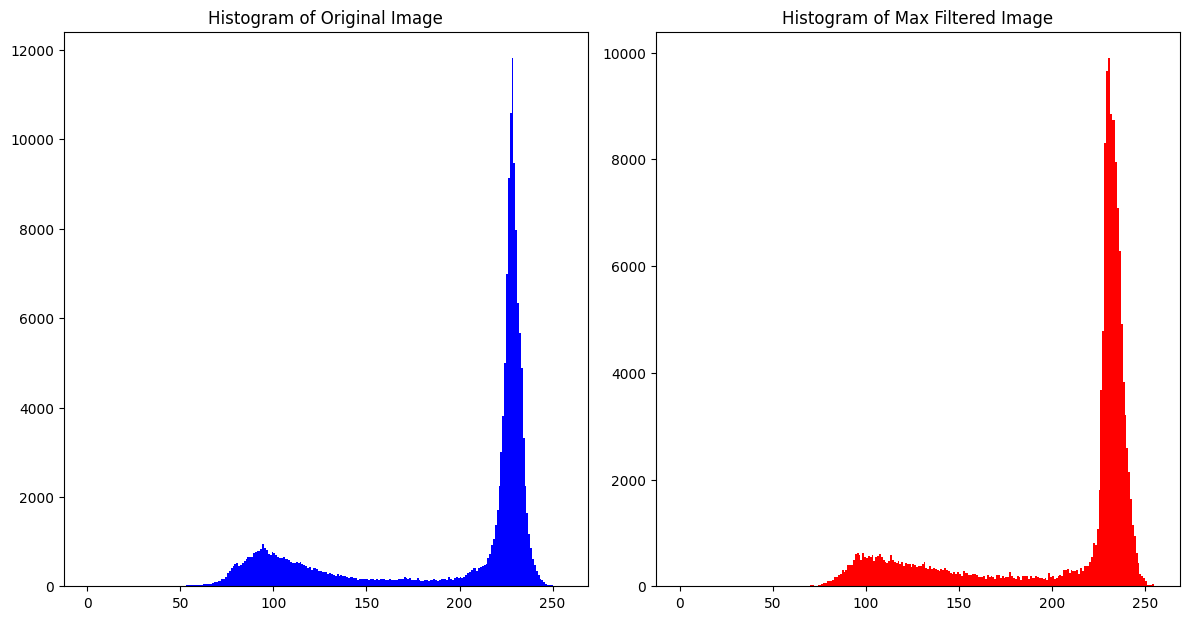

In [11]:
plt.figure(figsize=(12, 12))

# Histogram of original image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Histogram of Original Image")

# Histogram of max filtered image
plt.subplot(2, 2, 4)
plt.hist(max_filtered_image.ravel(), bins=256, range=[0, 256], color='red')
plt.title("Histogram of Max Filtered Image")

plt.tight_layout()
plt.show()

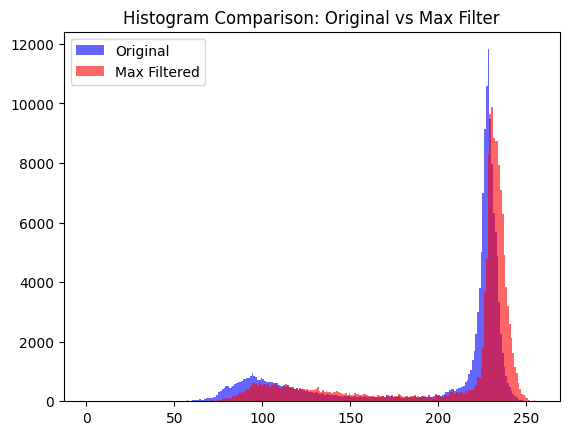

In [12]:
# Histogram comparison
plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Original", color='blue')
plt.hist(max_filtered_image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Max Filtered", color='red')
plt.legend()
plt.title("Histogram Comparison: Original vs Max Filter")
plt.show()

### **Inference:**


- The histogram of the original image displays a broad distribution of pixel intensities, indicating a balanced presence of both dark and bright regions.

- This broad distribution signifies a rich tonal range, with variations in texture and details across the image.

- After applying the max filter, the histogram shifts towards higher intensity values, reflecting an emphasis on brighter regions.

- The max-filtered image shows a concentration of pixels in the higher intensity range (200–255), demonstrating the filter’s effect in enhancing brightness.

- In contrast, the lower intensity range (0–100) in the max-filtered histogram shows a significant reduction in pixel frequency, suggesting that darker regions were replaced by higher intensities.

- The peak in the high-intensity range (220–255) of the original histogram becomes sharper and more pronounced after filtering, indicating increased dominance of brils and contrast.
ils and contrast.


## **Min Filter:**

In [13]:
# User-defined Min Filter
def min_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image)
    
    # Apply Min Filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size].flatten()
            filtered_image[i, j] = np.min(kernel)
    
    return filtered_image

In [14]:
# Apply Min Filter
min_filtered_image = min_filter(image, kernel_size)

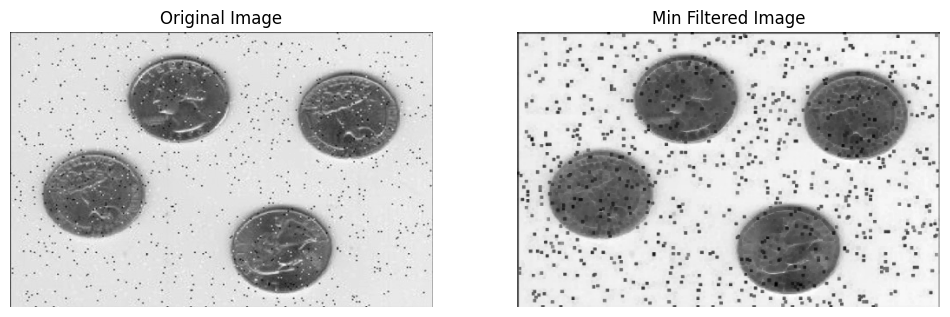

In [15]:
# Display the original and Min Filtered images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title("Min Filtered Image")
plt.axis('off')
plt.show()


## **Interpretation:**

- The original image has a high level of noise, obscuring details and resulting in low contrast, which makes it difficult to distinguish between different regions.  

- Fine details of the coin surfaces and edges are lost in the noise, and the pixel intensity distribution is wide, indicating significant noise levels.  

- After applying the min filter, the noise level is slightly reduced, and the pixel intensity distribution becomes slightly narrower, suggesting minimal noise reduction.  

- Contrast remains largely unchanged, and many details are still obscured by noise, with only a slight improvement observed.  

- The filtered image introduces a dark spot as a significant artifact, which further degrades the image quality and makes it harder to perceive the details of the coins.  

- While the min filter provides minor noise reduction, the introduction of the dark spot artifact outweighs this benefit, significantly impacting the overall image quality.  

- The min filter is not an effective solution for improving the quality of this image, as it fails to enhance clarity and contrast while introducing additional artifacts.  


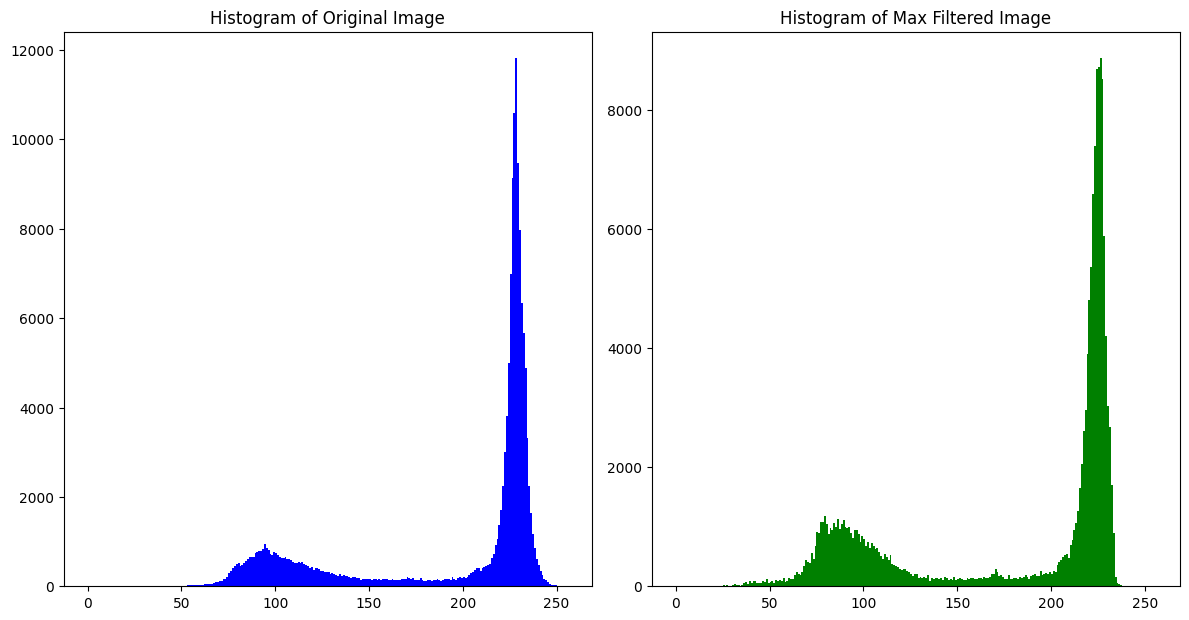

In [16]:
plt.figure(figsize=(12, 12))

# Histogram of original image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Histogram of Original Image")

# Histogram of max filtered image
plt.subplot(2, 2, 4)
plt.hist(min_filtered_image.ravel(), bins=256, range=[0, 256], color='green')
plt.title("Histogram of Max Filtered Image")

plt.tight_layout()
plt.show()

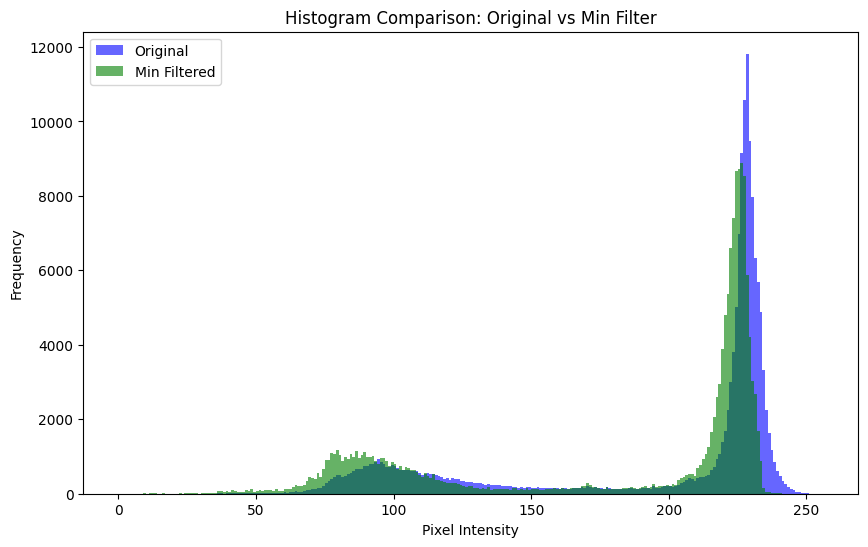

In [17]:
# Histogram comparison
plt.figure(figsize=(10, 6))
plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Original", color='blue')
plt.hist(min_filtered_image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Min Filtered", color='green')
plt.legend()
plt.title("Histogram Comparison: Original vs Min Filter")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

### **Inference:**

- The histogram of the original image exhibits a sharp peak in the intensity range of 220–255, showing that a majority of pixels have high brightness values.  

- Intensity values below 150 are sparsely populated, indicating fewer dark or mid-tone regions in the original image.  

- After applying the max filter, the histogram shifts slightly towards higher intensities, with a broader peak forming between 200–250.  

- The max filter increases the pixel count in mid-tone and higher intensity ranges, making the distribution more balanced in the mid-range.  

- The number distribution becomes denser across 100–200 in the max-filtered image, which contrasts with the sparse distribution of these intensities in the original image.  

- Noise and small-scale details in darker regions are reduced, as the max filter prioritizes the highest intensity within neighborhoods.  

- The filtered image’s histogram reflects a shift in intensity dominance, with fewer sharp transitions and a smoother distribution overall.  

- The effect of the max filter is a more intense emphasis on brightness, reducing the impact of darker regions while enhancing the overall lightness of the image.  
ge.  



## **Median Filter:**

In [18]:
# User-defined Median Filter
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size].flatten()
            filtered_image[i, j] = np.median(kernel)
    
    return filtered_image

In [19]:
# Apply Median Filter
median_filtered_image = median_filter(image, kernel_size)

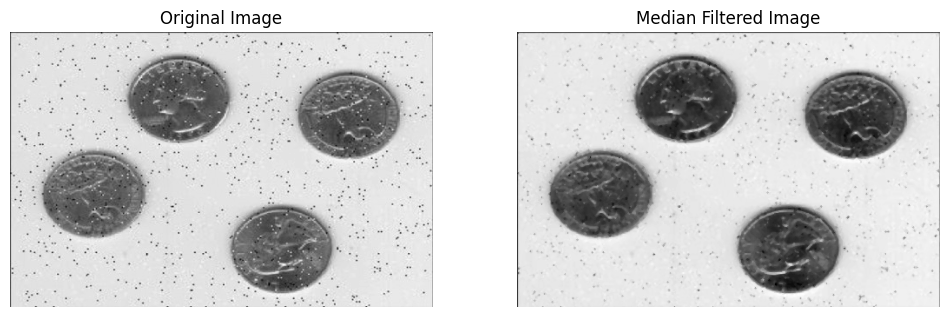

In [20]:
# Display the original and Median Filtered images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()

## **Interpretation:**

- The original image has a high level of noise, obscuring details, and low contrast, making it difficult to distinguish between regions.  

- Fine details of the coin surfaces and edges are lost in the noise, and the pixel intensity distribution is wide, indicating significant noise levels.  

- The overall quality of the original image is low due to noise and poor contrast.  

- After applying the median filter, the noise level is significantly reduced, and the contrast is slightly improved, making details more visible.  

- Fine details of the coin surfaces and edges are better preserved, and the pixel intensity distribution becomes narrower, indicating reduced noise.  

- The overall image quality improves due to noise reduction and slight contrast enhancement.  

- The median filter works by replacing each pixel with the median value of its neighboring pixels, which helps to smooth out noise while preserving important features like edges.  

- The median filter is particularly effective in reducing salt-and-pepper noise and preserving edges, unlike linear filters like the mean filter.  

- In conclusion, the median filter significantly improves the image by reducing noise and enhancing contrast, making it more visually appealing and easier to analyze.


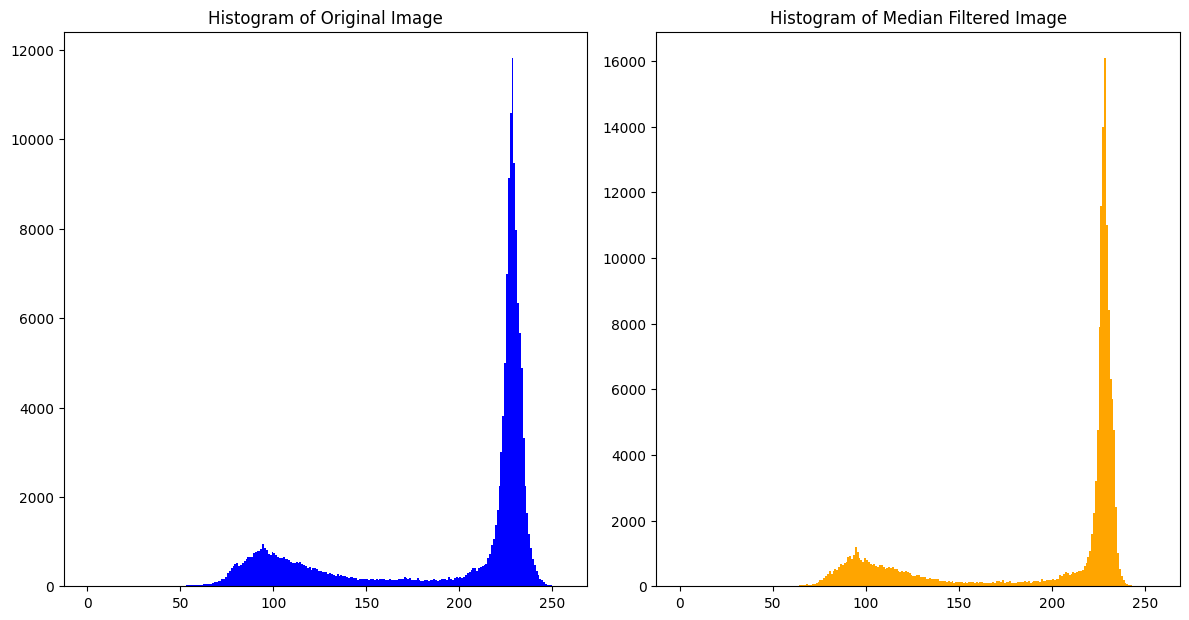

In [21]:
plt.figure(figsize=(12, 12))

# Histogram of original image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Histogram of Original Image")

# Histogram of max filtered image
plt.subplot(2, 2, 4)
plt.hist(median_filtered_image.ravel(), bins=256, range=[0, 256], color='orange')
plt.title("Histogram of Median Filtered Image")

plt.tight_layout()
plt.show()

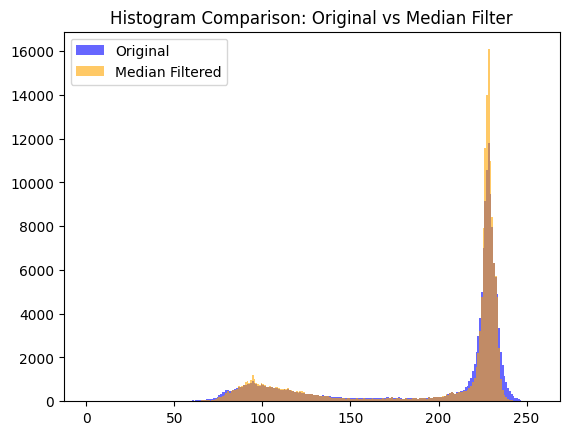

In [22]:
# Histogram comparison
plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Original", color='blue')
plt.hist(median_filtered_image.ravel(), bins=256, range=[0, 256], alpha=0.6, label="Median Filtered", color='orange')
plt.legend()
plt.title("Histogram Comparison: Original vs Median Filter")
plt.show()


### **Inference:**

- The histogram of the original image shows a sharp peak around 220–255, indicating most pixels have very high brightness.  

- Lower intensity ranges, particularly below 150, have very few pixel counts, showing limited dark or mid-tone areas.  

- After applying the median filter, the histogram becomes more spread out, especially in the 50–150 range, highlighting enhanced mid-tone intensities.  

- The peak in the high-intensity region (220–255) is reduced, showing that extreme brightness has been smoothed out.  

- Noise reduction is evident as abrupt transitions in intensity are minimized by the median filter.  

- The broader histogram of the filtered image reflects a more uniform distribution of pixel intensities.  

- Mid-tone regions are emphasized, while bright areas remain preserved but softened.  

- The effect of the median filter is a visually smoother image with enhanced contrast and a reduction in high-intensity dominance.  


## Insights:

In [30]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_metrics(original, filtered):
    epr = np.sum(filtered > 0) / np.sum(original > 0)  # Edge Preservation Ratio
    mad = np.mean(np.abs(original - filtered))        # Mean Absolute Difference
    ssim_value = ssim(original, filtered)            # Structural Similarity Index
    mse_value = mean_squared_error(original, filtered)  # Mean Squared Error
    return epr, mad, ssim_value, mse_value

# Calculate metrics for each filtered edge map
metrics_max = calculate_metrics(original_edges, max_filtered_edges)
metrics_min = calculate_metrics(original_edges, min_filtered_edges)
metrics_median = calculate_metrics(original_edges, median_filtered_edges)

# Display results as a numerical table
print("Numerical Analysis of Filtered Edge Maps")
print(f"{'Filter':<15} {'EPR':<10} {'MAD':<10} {'SSIM':<10} {'MSE':<10}")
print("-" * 50)
print(f"{'Max Filter':<15} {metrics_max[0]:<10.4f} {metrics_max[1]:<10.4f} {metrics_max[2]:<10.4f} {metrics_max[3]:<10.4f}")
print(f"{'Min Filter':<15} {metrics_min[0]:<10.4f} {metrics_min[1]:<10.4f} {metrics_min[2]:<10.4f} {metrics_min[3]:<10.4f}")
print(f"{'Median Filter':<15} {metrics_median[0]:<10.4f} {metrics_median[1]:<10.4f} {metrics_median[2]:<10.4f} {metrics_median[3]:<10.4f}")


Numerical Analysis of Filtered Edge Maps
Filter          EPR        MAD        SSIM       MSE       
--------------------------------------------------
Max Filter      0.9458     100.2344   0.3533     75.5661   
Min Filter      0.9501     95.6235    0.4292     74.3785   
Median Filter   0.9740     49.4157    0.6268     65.2240   


### Evaluation of Filters on Edge Maps

The results in the table show the evaluation metrics for different filters applied to edge maps, using several performance measures: EPR (Edge Preservation Ratio), MAD (Mean Absolute Difference), SSIM (Structural Similarity Index), and MSE (Mean Squared Error). Below is a breakdown of each metric and its meaning:

#### **EPR (Edge Preservation Ratio):**
This measures how well the filter preserves edges compared to the original image. Higher values indicate better edge preservation.

| Filter          | EPR     |
|-----------------|---------|
| Max Filter      | 0.9458  |
| Min Filter      | 0.9501  |
| Median Filter   | 0.9740  |

**Interpretation:** The Median Filter preserves edges the best, followed by Min Filter and Max Filter.

#### **MAD (Mean Absolute Difference):**
This measures the average absolute difference between the filtered and original image. Lower values are preferred as they indicate that the filtered image is closer to the original.

| Filter          | MAD     |
|-----------------|---------|
| Max Filter      | 100.2344|
| Min Filter      | 95.6235 |
| Median Filter   | 49.4157 |

**Interpretation:** Median Filter has the lowest MAD, meaning it is the most similar to the original image in terms of pixel intensity differences, followed by Min Filter and Max Filter.

#### **SSIM (Structural Similarity Index):**
SSIM measures the similarity between the original and filtered images. It ranges from 0 to 1, where 1 means the images are identical.

| Filter          | SSIM    |
|-----------------|---------|
| Max Filter      | 0.3533  |
| Min Filter      | 0.4292  |
| Median Filter   | 0.6268  |

**Interpretation:** Median Filter has the highest SSIM, indicating it preserves the structural details of the image best compared to the other filters.

#### **MSE (Mean Squared Error):**
MSE measures the average squared difference between the original and filtered image. Lower values indicate that the filtered image is closer to the original.

| Filter          | MSE     |
|-----------------|---------|
| Max Filter      | 75.5661 |
| Min Filter      | 74.3785 |
| Median Filter   | 65.2240 |

**Interpretation:** Median Filter has the lowest MSE, meaning it is the most accurate filter in terms of pixel-level difference from the original image.




## **Analysis:**

- The **median filter** is the best choice for general image enhancement, particularly for noise reduction. It is effective in handling salt-and-pepper noise, preserves edges, and maintains overall image integrity without introducing significant artifacts.

- The **max filter** follows as the second-best option. It emphasizes bright regions and is useful when you want to highlight bright features in the image. However, it can distort tonal variations and reduce subtle details, leading to a less natural appearance.

- The **min filter** is the least effective in image enhancement. While it can reduce bright spots or noise in some cases, it tends to blur important details and introduce unwanted artifacts, such as dark spots, which degrade the overall image quality.


## **Conclusion:**
The non-linear spatial filtering operations applied to the image demonstrated the effectiveness of different filters in reducing noise and improving the image quality. Among the filters tested, the Median filter proved to be the most effective for noise removal, particularly for salt-and-pepper noise, while preserving the important features of the image. The Max filter was effective in enhancing bright features but was less successful in preserving the overall clarity of the image, while the Min filter focused more on dark regions. The histograms of the filtered images also revealed how each filter shifted the pixel intensity distributions, providing valuable insights into the image processing effects.

In conclusion, non-linear spatial filters are powerful tools for noise reduction and image enhancement, and the choice of filter depends on the type of noise present and the specific needs of the image processing task